In [5]:
pip install --upgrade pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 2.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.5 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.8 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 2.8 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 2.6 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.8 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.1 MB 2.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 2.9 MB/s eta 0:00:01
   ---------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),  # Corrected typo
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
try:
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='muhammadanees15402',
        database='ecommerce'
    )
    cursor = conn.cursor()
except mysql.connector.Error as err:
    print(f"Error: {err}")
    exit(1)

# Folder containing the CSV files
folder_path = 'C:/Users/Dell/Desktop/e-commerce'

# Debugging: Print folder path and files
print(f"Folder Path: {folder_path}")
print(f"Files in Folder: {os.listdir(folder_path)}")

def get_sql_type(dtype, col):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        # Use VARCHAR(255) for text fields, adjust length as needed
        return 'VARCHAR(255)'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    if not os.path.exists(file_path):
        print(f"File {csv_file} not found. Skipping...")
        continue
    
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Replace NaN with None to handle SQL NULL
        df = df.where(pd.notnull(df), None)
        
        # Debugging: Check for NaN values
        print(f"Processing {csv_file}")
        print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

        # Clean column names
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Generate the CREATE TABLE statement with appropriate data types
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype, col)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        cursor.execute(create_table_query)

        # Insert DataFrame data into the MySQL table using batch insert
        values = [tuple(None if pd.isna(x) else x for x in row) for _, row in df.iterrows()]
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(df.columns))})"
        cursor.executemany(sql, values)

        # Commit the transaction for the current CSV file
        conn.commit()
        print(f"Data from {csv_file} inserted into {table_name} successfully.")
    
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        conn.rollback()

# Close the connection
conn.close()

Folder Path: C:/Users/Dell/Desktop/e-commerce
Files in Folder: ['.ipynb_checkpoints', 'convater.ipynb', 'customers.csv', 'geolocation.csv', 'orders.csv', 'order_items.csv', 'payments.csv', 'products.csv', 'sellers.csv']
Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data from customers.csv inserted into customers successfully.
Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data from orders.csv inserted into orders successfully.
Processing sellers.csv
NaN values before replacement:
seller_id        

OperationalError: 2055: Lost connection to MySQL server at 'localhost:3306', system error: Errno 10053: An established connection was aborted by the software in your host machine

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),  # Corrected typo
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
try:
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='muhammadanees15402',
        database='ecommerce'
    )
    cursor = conn.cursor()
except mysql.connector.Error as err:
    print(f"Error: {err}")
    exit(1)

# Folder containing the CSV files
folder_path = 'C:/Users/Dell/Desktop/e-commerce'

# Debugging: Print folder path and files
print(f"Folder Path: {folder_path}")
print(f"Files in Folder: {os.listdir(folder_path)}")

def get_sql_type(dtype, col):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        # Use VARCHAR(255) for text fields, adjust length as needed
        return 'VARCHAR(255)'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    if not os.path.exists(file_path):
        print(f"File {csv_file} not found. Skipping...")
        continue
    
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Replace NaN with None to handle SQL NULL
        df = df.where(pd.notnull(df), None)
        
        # Debugging: Check for NaN values
        print(f"Processing {csv_file}")
        print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

        # Clean column names
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Generate the CREATE TABLE statement with appropriate data types
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype, col)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        cursor.execute(create_table_query)

        # Insert DataFrame data into the MySQL table using batch insert
        values = [tuple(None if pd.isna(x) else x for x in row) for _, row in df.iterrows()]
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(df.columns))})"
        cursor.executemany(sql, values)

        # Commit the transaction for the current CSV file
        conn.commit()
        print(f"Data from {csv_file} inserted into {table_name} successfully.")
    
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        conn.rollback()

# Close the connection
conn.close()

Folder Path: C:/Users/Dell/Desktop/e-commerce
Files in Folder: ['.ipynb_checkpoints', 'convater.ipynb', 'customers.csv', 'geolocation.csv', 'orders.csv', 'order_items.csv', 'payments.csv', 'products.csv', 'sellers.csv']
Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data from customers.csv inserted into customers successfully.
Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data from orders.csv inserted into orders successfully.
Processing sellers.csv
NaN values before replacement:
seller_id        

OperationalError: 2055: Lost connection to MySQL server at 'localhost:3306', system error: Errno 10053: An established connection was aborted by the software in your host machine

In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),  # Corrected typo
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
try:
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='muhammadanees15402',
        database='ecommerce'
    )
    cursor = conn.cursor()
except mysql.connector.Error as err:
    print(f"Error: {err}")
    exit(1)

# Folder containing the CSV files
folder_path = 'C:/Users/Dell/Desktop/e-commerce'

# Debugging: Print folder path and files
print(f"Folder Path: {folder_path}")
print(f"Files in Folder: {os.listdir(folder_path)}")

def get_sql_type(dtype, col):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        # Use VARCHAR(255) for text fields, adjust length as needed
        return 'VARCHAR(255)'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    if not os.path.exists(file_path):
        print(f"File {csv_file} not found. Skipping...")
        continue
    
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Replace NaN with None to handle SQL NULL
        df = df.where(pd.notnull(df), None)
        
        # Debugging: Check for NaN values
        print(f"Processing {csv_file}")
        print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

        # Clean column names
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

        # Generate the CREATE TABLE statement with appropriate data types
        columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype, col)}' for col in df.columns])
        create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
        cursor.execute(create_table_query)

        # Insert DataFrame data into the MySQL table using batch insert
        batch_size = 1000  # Adjust this value as needed
        for i in range(0, len(df), batch_size):
            batch = df[i:i + batch_size]
            values = [tuple(None if pd.isna(x) else x for x in row) for _, row in batch.iterrows()]
            sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(df.columns))})"
            cursor.executemany(sql, values)
            conn.commit()
            print(f"Inserted {len(batch)} rows into {table_name}.")
        
        print(f"Data from {csv_file} inserted into {table_name} successfully.")
    
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        conn.rollback()

# Close the connection
conn.close()

Folder Path: C:/Users/Dell/Desktop/e-commerce
Files in Folder: ['.ipynb_checkpoints', 'convater.ipynb', 'customers.csv', 'geolocation.csv', 'orders.csv', 'order_items.csv', 'payments.csv', 'products.csv', 'sellers.csv']
Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.
Inserted 1000 rows into customers.


In [5]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector



db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "muhammadanees15402",
                            database = "ecommerce")

cur = db.cursor()


#   1. List all unique cities where customers are located.

In [7]:
query = """select distinct(customer_city) from customers"""

cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### 2 Count the number of orders placed in 2017.

In [9]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)
data = cur.fetchall()
data[0][0]

180404

### 3. Find the total sales per category.

In [15]:
query = """
SELECT 
    UPPER(products.product_category) AS category,
    ROUND(SUM(payments.payment_value),2) AS sales
FROM 
    products
JOIN 
    order_items ON products.product_id = order_items.product_id
JOIN 
    payments ON payments.order_id = order_items.order_id
GROUP BY 
    UPPER(products.product_category);
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["category", "sales"])
df

,category,sales
0,FURNITURE DECORATION,4290529.18
1,TELEPHONY,1460646.15
2,BED TABLE BATH,5137661.01
3,AUTOMOTIVE,2556882.99
4,COMPUTER ACCESSORIES,4755991.34
...,...,...
69,CDS MUSIC DVDS,3598.29
70,LA CUISINE,8740.59
71,FASHION CHILDREN'S CLOTHING,2357.01
72,PC GAMER,6523.29


In [25]:
query = """ 
SELECT 
    (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) / COUNT(*)) * 100  AS percentage 
FROM 
    payments;
"""
cur.execute(query)
data = cur.fetchall()
print(data)



[(Decimal('99.9981'),)]


# 4. Calculate the percentage of orders that were paid in installments.

In [17]:
query = """
SELECT 
    (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS percentage
FROM 
    payments;
"""
cur.execute(query)
data = cur.fetchall()
print(data)

[(Decimal('99.9981'),)]


## . Count the number of customers from each state. 


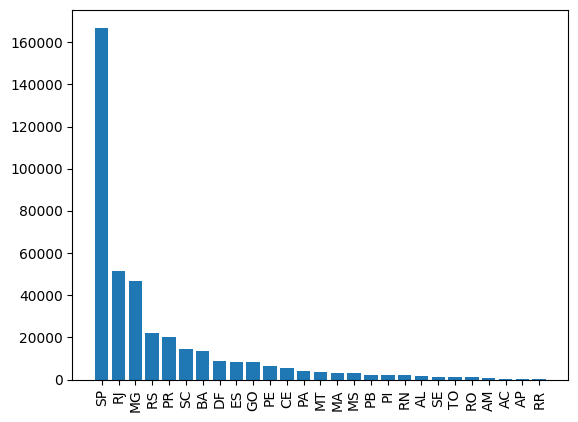

In [18]:
query = """
SELECT 
    customer_state, 
    COUNT(customer_id) AS customer_count
FROM customers
GROUP BY customer_state
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["State", "Customer_Count"])
df = df.sort_values(by = "Customer_Count", ascending = False)
plt.bar(df["State"],df["Customer_Count"])
plt.xticks(rotation =90)

plt.show()
